<a href="https://colab.research.google.com/github/darshi0301/Rice-Forecasting/blob/main/Rice_Exports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXPLORING FOREIGN RICE MARKET FOR EXPORTS

In [8]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Rice_Exports.csv'
import pandas as pd
df = pd.read_csv(file_path)

df.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Year,Continent ID,Continent,Country ID,Country,Trade Value
0,2022,af,Africa,afmus,Mauritius,993888
1,2022,as,Asia,asare,United Arab Emirates,936538
2,2022,na,North America,nacan,Canada,883566
3,2022,oc,Oceania,ocaus,Australia,803402
4,2022,eu,Europe,eugbr,United Kingdom,539263
5,2022,eu,Europe,euita,Italy,511954
6,2022,eu,Europe,eunld,Netherlands,430382
7,2022,na,North America,nausa,United States,363800
8,2022,eu,Europe,eufra,France,316637
9,2022,eu,Europe,eudeu,Germany,313700


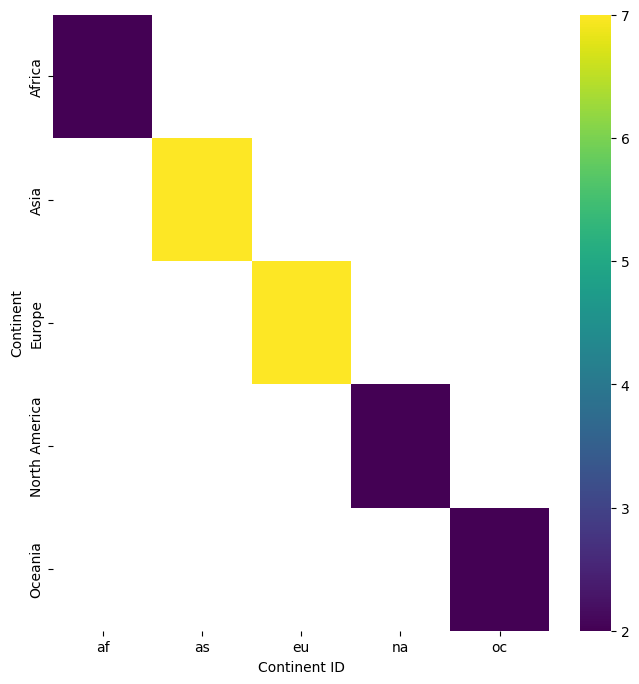

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Continent'].value_counts()
    for x_label, grp in _df_8.groupby('Continent ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Continent ID')
_ = plt.ylabel('Continent')

In [3]:
!pip install pandas plotly


In [9]:
!pip install pycountry

import pycountry
import requests

# Convert country names to ISO alpha-3
def convert_to_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

df['ISO3'] = df['Country'].apply(convert_to_iso3)
import plotly.express as px

# Create the choropleth map
fig = px.choropleth(
    df,
    locations="ISO3",  # Column with ISO alpha-3 codes
    color="Trade Value",  # Values to represent
    hover_name="Country",  # Hover text
    title="World Map of Trading Values",
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale
    labels={'Trading_Value': 'Trading Value'}
)

# Load GeoJSON data for centroids
geojson_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
geojson_data = requests.get(geojson_url).json()

annotations = []
for feature in geojson_data['features']:
    iso3 = feature['id']  # ISO3 code in GeoJSON
    if iso3 in df['ISO3'].values:
        country_name = feature['properties']['name']
        trading_value = df.loc[df['ISO3'] == iso3, 'Trade Value'].values[0]

        # Extract centroid coordinates
        geometry = feature['geometry']['coordinates']
        centroid = None

        if feature['geometry']['type'] == "Polygon":
            # For single polygons, use the first set of coordinates
            centroid = geometry[0][0]
        elif feature['geometry']['type'] == "MultiPolygon":
            # For multipolygons, use the first polygon's first set of coordinates
            centroid = geometry[0][0][0]

        # If a valid centroid was found, add it as an annotation
        if centroid and isinstance(centroid, list) and len(centroid) >= 2:
            annotations.append(
                dict(
                    x=centroid[0],
                    y=centroid[1],
                    text=country_name,
                    showarrow=False,
                    font=dict(size=8, color="black"),
                )
            )

# Add annotations to the map
fig.update_layout(
    annotations=annotations,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
    )
)


# Show the map
fig.show()
